## Generating Sample Data
One very valuable tool for working with the algorithms we will study is the ability to create fake data sets with certain properties.  Let's start by looking at creating data with a uniform distribution.

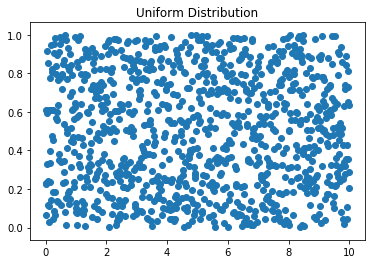

In [2]:
import numpy as np
import matplotlib.pyplot as plt

N = 1000
x = np.linspace(0.0, 10.0, N)
y = np.random.rand(N)
plt.title('Uniform Distribution')
plt.scatter(x,y)
plt.show()

Now let's make a normal distribution.  For the one-dimensional case, we will shgow the distribution as a histogram.  W need to generate lots of values to start seeing the shape in this kind of plot.  The "loc" variable is the mean and the "scale" variable is the standard deviation.

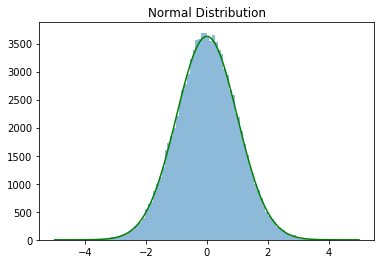

In [27]:
import matplotlib.mlab as mlab
import math

N = 100000
mu = 0.0
variance = 1.0
sigma = math.sqrt(variance)

#draw histograms
y = np.random.normal(loc = mu, scale=sigma, size=N)

plt.title('Normal Distribution')
plt.hist(y, bins = 100, alpha = 0.5)

# draw the normal distribution pdf
x = np.linspace(mu-5*variance,mu+5*variance, 100)

plt.show()

larger values of the variance will 'flatten' the distribution, while smaller values will create a spike at the mean.

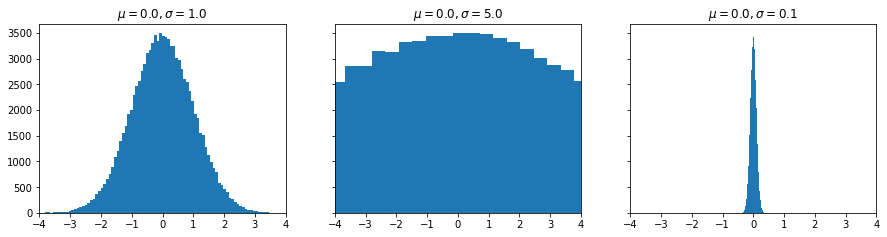

In [40]:

pl, (a1, a2, a3) = plt.subplots(1,3, figsize=(15,15), sharey=True,
                               subplot_kw = {'adjustable':'box-forced'})
y1 = np.random.normal(loc = mu, scale=sigma, size=N)
y2 = np.random.normal(loc = mu, scale=5*sigma, size=N)
y3 = np.random.normal(loc = mu, scale=sigma/10, size=N)

a1.hist(y1, bins = 100)
a1.set_title(r'$\mu = 0.0, \sigma = 1.0$')
a1.set_xlim([-4, 4])

a2.hist(y2, bins = 100)
a2.set_title(r'$\mu = 0.0, \sigma = 5.0$')
a2.set_xlim([-4, 4])

a3.hist(y3, bins = 100)
a3.set_xlim([-4, 4])
a3.set_title(r'$\mu = 0.0, \sigma = 0.1$')

plt.subplots_adjust(top=0.3)

plt.show()

OK, now let's look at multivariate normal distributions.  this is a little more complicated.  Instead of just a single mean and standard deviation (sd), we have a vector of means and a covariance matrix for the variance values (standard deviations squared).

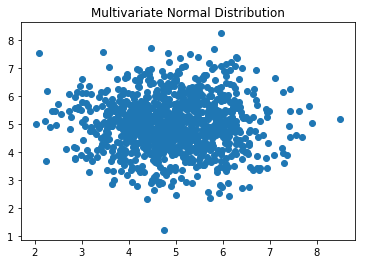

In [24]:
N = 1000
x,y = np.random.multivariate_normal(mean=[5,5], cov = [[1, 0], [0, 1]], size=N).T

plt.title('Multivariate Normal Distribution')
plt.scatter(x,y)
plt.show()

The covariance matrix is a special representation of the variance of the distribution.  Since it is a matrix, we can represent the relationships between different dimensions of variance and we can represent correlation of the distribution on different axes:

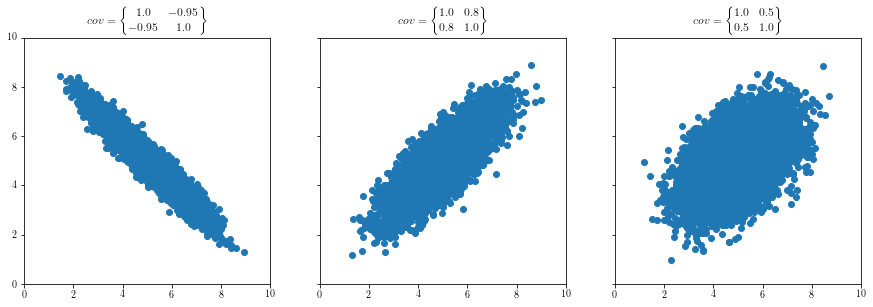

In [104]:
from matplotlib import rcParams
rcParams['text.usetex'] = True
rcParams['text.latex.preamble'] = r'\usepackage{amsmath}'

N=10000
x1,y1 = np.random.multivariate_normal(mean=[5,5], cov = [[1, -.95], [-0.95, 1]], size=N).T
x2,y2 = np.random.multivariate_normal(mean=[5,5], cov = [[1, .8], [0.8, 1]], size=N).T
x3,y3 = np.random.multivariate_normal(mean=[5,5], cov = [[1, .5], [0.5, 1]], size=N).T

pl, (a1, a2, a3) = plt.subplots(1,3, figsize=(15,15), sharey=True, 
                                subplot_kw = {'aspect':1.0,'adjustable':'box-forced'})

#a1.set_title('Multivariate Normal Distribution')
a1.scatter(x1,y1)
a1.set_title(r'$cov = \left \{ \begin{matrix} 1.0 & -0.95 \\ -0.95 & 1.0 \end{matrix} \right \}$')
a1.set_xlim([0, 10])
a1.set_ylim([0, 10])

a2.scatter(x2,y2)
a2.set_title(r'$cov = \left \{ \begin{matrix} 1.0 & 0.8 \\ 0.8 & 1.0 \end{matrix} \right \}$')
a2.set_xlim([0, 10])
a2.set_ylim([0, 10])

a3.scatter(x3, y3)
a3.set_title(r'$cov = \left \{ \begin{matrix} 1.0 & 0.5 \\ 0.5 & 1.0 \end{matrix} \right \}$')
a3.set_xlim([0, 10])
a3.set_ylim([0, 10])
plt.show()

Note how the off-diagonal entries of the covariance matrix affect the shape of the data.  

We can create some useful data sets for experimentation using the simple tools above.  For example, one important assumption in modeling is that the variation (called residuals in statistics) of the model from actual data is always normally distributed.  We can test this assumption by starting with a model and then generating "realistic" data that conforms to the normal distribution of residuals.

We start with a line:
$$ y = f(x) = ax + b $$
We build a simple example by setting $a = 1$ and $b = 1$.

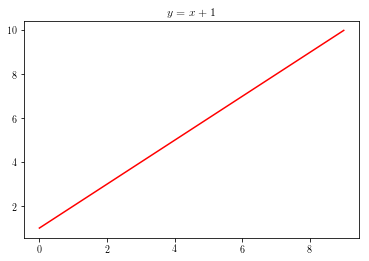

In [114]:
x = np.arange(0,10)
plt.plot(x, x+1, color='r')
plt.title(r'$y = x + 1$')
plt.show()

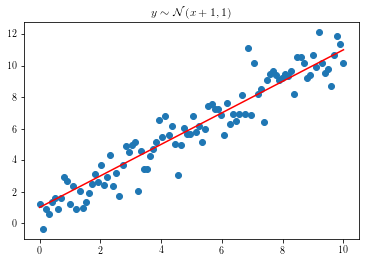

In [135]:
# Now lets add some randomness
N = 100
x = np.linspace(0.0, 10.0, N)
y_model = lambda x: x + 1
y = [np.random.normal(loc = y_model(_x), scale=1.0, size=1) for _x in x]
plt.scatter(x,y)
plt.plot(x, x+1, color='r')
plt.title(r'$y \sim \mathcal{N}(x + 1,1) $')
plt.show()

We've generated one hundred points that are normally distributed about the length of the line.  If we produce a linear model from this data, it should very closely match our line.

In [136]:
import statsmodels.api as sm
model = sm.OLS(y, sm.add_constant(x))
results = model.fit()
p = results.params
results.cov_params()

array([[ 0.03592875, -0.00536223],
       [-0.00536223,  0.00107245]])

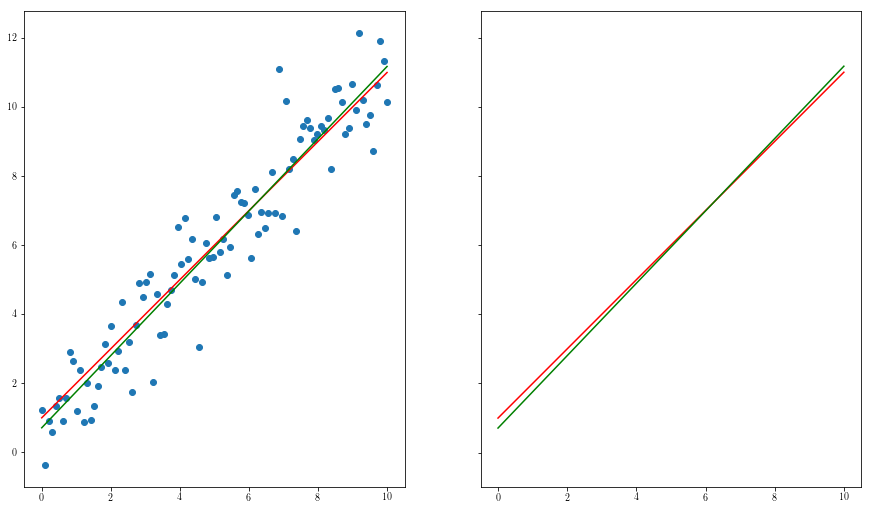

In [137]:
#print the regression line too
pl, (a1, a2) = plt.subplots(1,2, figsize=(15,15), sharey=True, 
                                subplot_kw = {'aspect':1.0,'adjustable':'box-forced'})

y_hat = p[0] + p[1]*x
a1.scatter(x,y)
a1.plot(x, x+1, color='r')
a1.plot(x, y_hat, color='g')

a2.plot(x, x+1, color='r')
a2.plot(x, y_hat, color='g')

plt.show()

In the above we can see that the generated line overlaps nicely with the assumed line, at least near the data used for the estimate.  This illustrates an important point about machine learning in general.  If you don't have musch data, your learned function will diverge from the 'actual' (unknown) function when you get away from the data used to build the model.  Thngs get better when you have lots of data.  If we rerun the above experiment with 1,000,000 points, the red and green lines line up nearly perfectly (try it!)

These tools will be used to create test data throughout the course to demonstrate different capabilities and problems with various Machine Learning methods.

Some data is problematic for linear regression, for example.  It can be instructive to generate data that fits into problematic categories so that we can see what goes wrong with common machine learning techniques. We'll look at this in a later lecture.

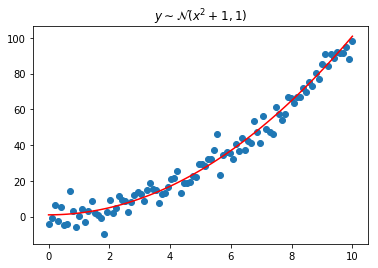

In [5]:
N = 100
x = np.linspace(0.0, 10.0, N)
y_model = lambda x: x*x + 1
y = [np.random.normal(loc = y_model(_x), scale=5.0, size=1) for _x in x]
plt.scatter(x,y)
plt.plot(x, x*x+1, color='r')
plt.title(r'$y \sim \mathcal{N}(x^2 + 1,1) $')
plt.show()